# Cuaderno Interactivo de Jupyter para Comparación de Solucionadores de Puzzle de 8 Piezas

Este cuaderno unifica tres algoritmos (A* con heurística de Manhattan, DFS y BFS) para resolver el puzzle de 8 piezas. Cada algoritmo se ejecuta en una celda independiente, y sus métricas de rendimiento (número de estados visitados y número de pasos en la solución) se comparan en una visualización final.


Primero importamos las librerias

In [27]:
import copy
from collections import deque
import matplotlib.pyplot as plt
import numpy as np 

## Metodo A* con manhattan 

Definimos los estados inicial y objetivo para el puzzle de 8 piezas, que serán utilizados por todos los algoritmos.

In [28]:
class EstadoPuzzle:
    def __init__(self, tablero, estado_objetivo, padre=None, movimiento=""):
        self.tablero = tablero
        self.estado_objetivo = estado_objetivo
        self.padre = padre
        self.movimiento = movimiento
        
    def es_objetivo(self):
        return self.tablero == self.estado_objetivo

    def distancia_manhattan(self, estado):
        distancia = 0
        for i in range(3):
            for j in range(3):
                valor = estado[i][j]
                if valor != 0:
                    x_objetivo = (valor - 1) // 3
                    y_objetivo = (valor - 1) % 3
                    distancia += abs(x_objetivo - i) + abs(y_objetivo - j)
        return distancia

    def obtener_posicion_vacia(self):
        for i in range(3):
            for j in range(3):
                if self.tablero[i][j] == 0:
                    return i, j
        return None

    def obtener_movimientos_posibles(self):
        movimientos = []
        x, y = self.obtener_posicion_vacia()
        direcciones = [('ARRIBA', -1, 0), ('ABAJO', 1, 0), ('IZQUIERDA', 0, -1), ('DERECHA', 0, 1)]
        
        for direccion, dx, dy in direcciones:
            nuevo_x, nuevo_y = x + dx, y + dy
            if 0 <= nuevo_x < 3 and 0 <= nuevo_y < 3:
                movimientos.append((direccion, nuevo_x, nuevo_y))
        return movimientos

    def resolver(self):
        estados_por_visitar = [(self.distancia_manhattan(self.tablero), 0, self)]
        visitados = set()
        contador_estados_visitados = 0

        while estados_por_visitar:
            menor_f_score = min(estados_por_visitar, key=lambda x: x[0])
            estados_por_visitar.remove(menor_f_score)
            _, pasos, estado_actual = menor_f_score

            if estado_actual.es_objetivo():
                camino = obtener_camino_solucion(estado_actual)
                return camino, contador_estados_visitados

            tablero_actual = tuple(map(tuple, estado_actual.tablero))
            if tablero_actual in visitados:
                continue

            visitados.add(tablero_actual)
            contador_estados_visitados += 1

            for movimiento, nuevo_x, nuevo_y in estado_actual.obtener_movimientos_posibles():
                nuevo_tablero = [fila[:] for fila in estado_actual.tablero]
                x, y = estado_actual.obtener_posicion_vacia()
                nuevo_tablero[x][y], nuevo_tablero[nuevo_x][nuevo_y] = nuevo_tablero[nuevo_x][nuevo_y], nuevo_tablero[x][y]

                nuevo_estado = EstadoPuzzle(nuevo_tablero, self.estado_objetivo, estado_actual, movimiento)
                nuevo_tablero_tupla = tuple(map(tuple, nuevo_tablero))

                if nuevo_tablero_tupla not in visitados:
                    f_score = pasos + 1 + nuevo_estado.distancia_manhattan(nuevo_tablero)
                    estados_por_visitar.append((f_score, pasos + 1, nuevo_estado))
                    
        return None, contador_estados_visitados

def obtener_camino_solucion(estado):
    camino = []
    actual = estado
    while actual.padre:
        camino.append(actual.movimiento)
        actual = actual.padre
    camino.reverse()
    return camino
# Function to print a board
def imprimir_tablero(tablero):
    for fila in tablero:
        print(fila)
    print()

In [29]:
# Initial and goal states
estado_inicial = [
    [1, 2, 0],
    [4, 6, 3],
    [7, 5, 8]
]

estado_objetivo = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 0]
]
# Run A* algorithm
print("Estado inicial:")
imprimir_tablero(estado_inicial)
puzzle_astar = EstadoPuzzle(estado_inicial, estado_objetivo)
solucion_astar, estados_visitados_astar = puzzle_astar.resolver()

if solucion_astar:
    print("¡Solución encontrada!")
    print("Número de movimientos:", len(solucion_astar))
    print("Movimientos:", solucion_astar)
    print("Estados visitados:", estados_visitados_astar)
    print("Estado Final:")
    imprimir_tablero(estado_objetivo)
else:
    print("¡No se encontró solución!")

Estado inicial:
[1, 2, 0]
[4, 6, 3]
[7, 5, 8]

¡Solución encontrada!
Número de movimientos: 4
Movimientos: ['ABAJO', 'IZQUIERDA', 'ABAJO', 'DERECHA']
Estados visitados: 4
Estado Final:
[1, 2, 3]
[4, 5, 6]
[7, 8, 0]



## Algoritmo 2: Búsqueda en Profundidad (DFS)

Esta celda implementa el algoritmo DFS con un límite de profundidad. El código se adapta para devolver la solución y el número de estados visitados.

In [30]:
class Nodo:
    def __init__(self, estado, padre=None, movimiento=None, profundidad=0):
        self.estado = estado
        self.padre = padre
        self.movimiento = movimiento
        self.profundidad = profundidad

    def generar_camino(self):
        camino = []
        nodo_actual = self
        while nodo_actual.padre is not None:
            camino.append(nodo_actual.movimiento)
            nodo_actual = nodo_actual.padre
        camino.reverse()
        return camino

class PuzzleDeslizante:
    def __init__(self, estado_inicial, estado_objetivo):
        self.estado_inicial = estado_inicial
        self.estado_objetivo = estado_objetivo
        self.movimientos = {
            "up": (-1, 0),
            "down": (1, 0),
            "left": (0, -1),
            "right": (0, 1)
        }

    def encontrar_vacio(self, estado):
        for i, fila in enumerate(estado):
            for j, valor in enumerate(fila):
                if valor == 0:
                    return i, j

    def mover(self, estado, direccion):
        fila_vacia, col_vacia = self.encontrar_vacio(estado)
        delta_fila, delta_col = self.movimientos[direccion]
        nueva_fila, nueva_col = fila_vacia + delta_fila, col_vacia + delta_col

        if 0 <= nueva_fila < len(estado) and 0 <= nueva_col < len(estado[0]):
            nuevo_estado = copy.deepcopy(estado)
            nuevo_estado[fila_vacia][col_vacia], nuevo_estado[nueva_fila][nueva_col] = \
                nuevo_estado[nueva_fila][nueva_col], nuevo_estado[fila_vacia][col_vacia]
            return nuevo_estado
        return None

    def resolver(self):
        LIMITE_PROFUNDIDAD = 5
        frontera = set()
        pila = [Nodo(self.estado_inicial)]
        contador_estados_visitados = 0

        while pila:
            nodo_actual = pila.pop()
            contador_estados_visitados += 1

            if nodo_actual.profundidad >= LIMITE_PROFUNDIDAD:
                continue

            if nodo_actual.estado == self.estado_objetivo:
                return nodo_actual.generar_camino(), contador_estados_visitados

            frontera.add(tuple(map(tuple, nodo_actual.estado)))

            for movimiento in self.movimientos:
                nuevo_estado = self.mover(nodo_actual.estado, movimiento)
                if nuevo_estado and tuple(map(tuple, nuevo_estado)) not in frontera:
                    nuevo_nodo = Nodo(nuevo_estado, nodo_actual, movimiento, nodo_actual.profundidad + 1)
                    pila.append(nuevo_nodo)

        return None, contador_estados_visitados

In [31]:
# Run DFS algorithm
print("Running Depth-First Search (DFS)")
print("Estado inicial:")
imprimir_tablero(estado_inicial)
puzzle_dfs = PuzzleDeslizante(estado_inicial, estado_objetivo)
solucion_dfs, estados_visitados_dfs = puzzle_dfs.resolver()

if solucion_dfs:
    print("Solución encontrada:", solucion_dfs)
    print("Cantidad de movimientos:", len(solucion_dfs))
    print("Estados visitados:", estados_visitados_dfs)
    print("Estado objetivo:")
    imprimir_tablero(estado_objetivo)
else:
    print("No se encontró solución.")

Running Depth-First Search (DFS)
Estado inicial:
[1, 2, 0]
[4, 6, 3]
[7, 5, 8]

Solución encontrada: ['down', 'left', 'down', 'right']
Cantidad de movimientos: 4
Estados visitados: 35
Estado objetivo:
[1, 2, 3]
[4, 5, 6]
[7, 8, 0]



## Algoritmo 3: Búsqueda en Anchura (BFS)

Esta celda implementa el algoritmo BFS. El código se adapta para devolver la solución y el número de estados visitados.


In [32]:
class Nodo:
    def __init__(self, estado, padre=None, movimiento=None, profundidad=0):
        self.estado = estado
        self.padre = padre
        self.movimiento = movimiento
        self.profundidad = profundidad

    def generar_camino(self):
        camino = []
        nodo_actual = self
        while nodo_actual.padre is not None:
            camino.append(nodo_actual.movimiento)
            nodo_actual = nodo_actual.padre
        camino.reverse()
        return camino

class PuzzleDeslizante:
    def __init__(self, estado_inicial, estado_objetivo):
        self.estado_inicial = estado_inicial
        self.estado_objetivo = estado_objetivo
        self.movimientos = {
            "up": (-1, 0),
            "down": (1, 0),
            "left": (0, -1),
            "right": (0, 1)
        }

    def encontrar_vacio(self, estado):
        for i, fila in enumerate(estado):
            for j, valor in enumerate(fila):
                if valor == 0:
                    return i, j

    def mover(self, estado, direccion):
        fila_vacia, col_vacia = self.encontrar_vacio(estado)
        delta_fila, delta_col = self.movimientos[direccion]
        nueva_fila, nueva_col = fila_vacia + delta_fila, col_vacia + delta_col

        if 0 <= nueva_fila < len(estado) and 0 <= nueva_col < len(estado[0]):
            nuevo_estado = copy.deepcopy(estado)
            nuevo_estado[fila_vacia][col_vacia], nuevo_estado[nueva_fila][nueva_col] = \
                nuevo_estado[nueva_fila][nueva_col], nuevo_estado[fila_vacia][col_vacia]
            return nuevo_estado
        return None

    def resolver(self):
        frontera = set()
        cola = deque([Nodo(self.estado_inicial)])
        contador_estados_visitados = 0

        while cola:
            nodo_actual = cola.popleft()
            contador_estados_visitados += 1

            if nodo_actual.estado == self.estado_objetivo:
                return nodo_actual.generar_camino(), contador_estados_visitados

            frontera.add(tuple(map(tuple, nodo_actual.estado)))

            for movimiento in self.movimientos:
                nuevo_estado = self.mover(nodo_actual.estado, movimiento)
                if nuevo_estado and tuple(map(tuple, nuevo_estado)) not in frontera:
                    nuevo_nodo = Nodo(nuevo_estado, nodo_actual, movimiento, nodo_actual.profundidad + 1)
                    cola.append(nuevo_nodo)

        return None, contador_estados_visitados

# Run BFS algorithm
print("Running Breadth-First Search (BFS)")
print("Estado inicial:")
imprimir_tablero(estado_inicial)
puzzle_bfs = PuzzleDeslizante(estado_inicial, estado_objetivo)
solucion_bfs, estados_visitados_bfs = puzzle_bfs.resolver()

if solucion_bfs:
    print("Solución encontrada:", solucion_bfs)
    print("Cantidad de movimientos:", len(solucion_bfs))
    print("Estados visitados:", estados_visitados_bfs)
    print("Estado objetivo:")
    imprimir_tablero(estado_objetivo)
else:
    print("No se encontró solución.")

Running Breadth-First Search (BFS)
Estado inicial:
[1, 2, 0]
[4, 6, 3]
[7, 5, 8]

Solución encontrada: ['down', 'left', 'down', 'right']
Cantidad de movimientos: 4
Estados visitados: 21
Estado objetivo:
[1, 2, 3]
[4, 5, 6]
[7, 8, 0]



## Comparación de Rendimiento

Esta celda recopila las métricas de rendimiento (estados visitados y número de pasos) de cada algoritmo y crea un gráfico de barras para compararlos.

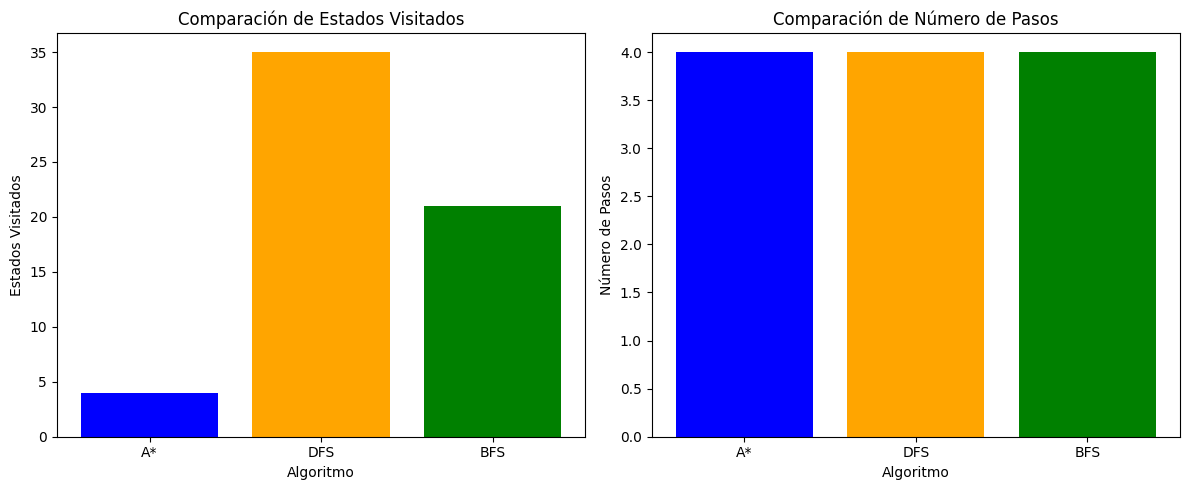

In [33]:
# Recopilar datos de rendimiento
algoritmos = ['A*', 'DFS', 'BFS']
estados_visitados = [
    estados_visitados_astar,
    estados_visitados_dfs,
    estados_visitados_bfs
]
pasos = [
    len(solucion_astar) if solucion_astar else 0,
    len(solucion_dfs) if solucion_dfs else 0,
    len(solucion_bfs) if solucion_bfs else 0
]

# Configurar el gráfico
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de estados visitados
x = np.arange(len(algoritmos))
ax1.bar(x, estados_visitados, color=['blue', 'orange', 'green'])
ax1.set_xlabel('Algoritmo')
ax1.set_ylabel('Estados Visitados')
ax1.set_title('Comparación de Estados Visitados')
ax1.set_xticks(x)
ax1.set_xticklabels(algoritmos)

# Gráfico de número de pasos
ax2.bar(x, pasos, color=['blue', 'orange', 'green'])
ax2.set_xlabel('Algoritmo')
ax2.set_ylabel('Número de Pasos')
ax2.set_title('Comparación de Número de Pasos')
ax2.set_xticks(x)
ax2.set_xticklabels(algoritmos)

plt.tight_layout()
plt.savefig('comparacion_puzzle.png')

Las gráficas muestran claramente la superioridad de el metodo A* con la distancia Manhattan como heurística en términos de eficiencia de búsqueda para esta instancia del puzzle 3x3. Aunque los tres algoritmos encontraron una solución de la misma cantidad de pasos a realizar, A* lo hizo explorando considerablemente menos estados. Esto resalta la ventaja de utilizar una búsqueda informada con una buena heurística para resolver problemas de búsqueda.